# Logistic Regression: HW #5

<div id="author"">
Chase Carlson<br>
The School of Business<br>
GSCM 575 - ML In Business<br>
Portland State University
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Read--and-Prepare-data" data-toc-modified-id="Read--and-Prepare-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read  and Prepare data</a></span><ul class="toc-item"><li><span><a href="#Read-and-Verify-Data" data-toc-modified-id="Read-and-Verify-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read and Verify Data</a></span></li><li><span><a href="#Pre-Process-Data" data-toc-modified-id="Pre-Process-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pre-Process Data</a></span></li><li><span><a href="#Pre-Analysis-Understanding-and-Feature-Selection" data-toc-modified-id="Pre-Analysis-Understanding-and-Feature-Selection-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pre-Analysis Understanding and Feature Selection</a></span></li><li><span><a href="#Target-Distribution" data-toc-modified-id="Target-Distribution-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Target Distribution</a></span></li><li><span><a href="#Feature-Relevance" data-toc-modified-id="Feature-Relevance-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Feature Relevance</a></span></li><li><span><a href="#Feature-Redundancy" data-toc-modified-id="Feature-Redundancy-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Feature Redundancy</a></span></li><li><span><a href="#Create-Feature-and-Target-Data-Structures" data-toc-modified-id="Create-Feature-and-Target-Data-Structures-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Create Feature and Target Data Structures</a></span></li></ul></li><li><span><a href="#Fit-Model-and-Evaluate-with-One-Hold-Out-Sample" data-toc-modified-id="Fit-Model-and-Evaluate-with-One-Hold-Out-Sample-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit Model and Evaluate with <em>One</em> Hold-Out Sample</a></span></li><li><span><a href="#Fit-Model,-then-Predict,-Evaluate-with-Multiple-Hold-Out-Samples" data-toc-modified-id="Fit-Model,-then-Predict,-Evaluate-with-Multiple-Hold-Out-Samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fit Model, then Predict, Evaluate with <em>Multiple</em> Hold-Out Samples</a></span></li><li><span><a href="#Automated-Feature-Selection" data-toc-modified-id="Automated-Feature-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Automated Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Univariate-Selection" data-toc-modified-id="Univariate-Selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Univariate Selection</a></span></li><li><span><a href="#Multivariate-Selection" data-toc-modified-id="Multivariate-Selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Multivariate Selection</a></span></li><li><span><a href="#Estimate-Validated-Model-on-All-Data" data-toc-modified-id="Estimate-Validated-Model-on-All-Data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Estimate Validated Model on All Data</a></span></li></ul></li><li><span><a href="#Apply-the-Model" data-toc-modified-id="Apply-the-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Apply the Model</a></span></li></ul></div>

## Preliminaries

Date of analysis:

In [1018]:
from datetime import datetime as dt
now = dt.now()
print("Analysis on ", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M %p"))

Analysis on  2023-07-27 at 18:07 PM


Establish current working directory:

In [1019]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

Import standard libraries

In [1020]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read  and Prepare data

A classic application of supervised machine learning classification is customer churn. The ability to successfully forecast a customer of a company's services and products about to no longer be a customer allows the company to commit resources to attempt to salvage the relationship. 

The following data file contains information on over 7000 customers of a telecom service, including former customers who left the service plan within the last 30 days the data was collected. Build a model to predict customer churn (customer exits the service plan), one of the variables in the data set.

Data: http://web.pdx.edu/~gerbing/data/CustomerChurn.csv

### Read and Verify Data

*a.*
- *Read the data into a data frame.*
- *Display the number of rows and columns in the data file, and the first five lines of the data file, including the variable names.*
- *Display all variable names and corresponding data values by transposing the output table.*
- *Display the data type for each variable.*

Read-in data and display first 5 rows. Number of rows and columns is displayed at the bottom.

In [1021]:
df = pd.read_csv("http://web.pdx.edu/~gerbing/data/CustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Display the variable names and values using transpose()

In [1022]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Display the data types for each variable:

In [1023]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

*b. The variable TotalCharges is conceptually a numeric variable but is read into the data frame as an object variable, i.e., non-numeric. Convert to numeric. As always, audit (verify) any change to the data table.*

Use the following code for the `to_numeric` function to convert (where _d_ is the data frame name, but could be any valid Python name).

`d['TotalCharges'] = pd.to_numeric(d['TotalCharges'], errors='coerce')`

The `errors` parameter set to `'coerce'` instructs to covert to a `NaN` any data value that cannot be converted to a legitimate number.

In [1024]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

View total missing data:

In [1025]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Pre-Process Data

*c. Drop the customerID variable.*

Hint: Illustrated in several previous notebooks, including 02Wrangle.`

Verify customerID was dropped by displaying the first few rows agian:

In [1026]:
df = df.drop(axis=1, columns=['customerID'])
df.head().transpose()

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


*d. Most of the variables are categorical. Pre-process each categorical variable to become a dummy variable, a type of indicator variable. Retain all $k$ dummy variables for each categorical variable with $k$ levels (to be able to pick and choose the dummy variables to analyze.*

Hint: You do not need to list each variable, though could, just the data frame name.

Use get_dummies() to transform all categorical variables in the data frame to dummy variables:

In [1027]:
df = pd.get_dummies(df)

*e. To keep the analysis simpler, and to drop excess dummy variables retain just the following (mostly indicator) variables for analysis.*

'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month',
              'PaperlessBilling_Yes', 'PaymentMethod_Mailed check', 
              'PhoneService_Yes', 'tenure', 'Dependents_Yes',
              'InternetService_No', 'Churn_Yes'

Hint: See subsetting in 02Wrangling.

In [1028]:
subset = ['MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month',
            'PaperlessBilling_Yes', 'PaymentMethod_Mailed check', 
            'PhoneService_Yes', 'tenure', 'Dependents_Yes',
            'InternetService_No', 'Churn_Yes']
df2 = df.filter(subset)
df2.head().transpose()

,0,1,2,3,4
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
Contract_Month-to-month,1.00,0.00,1.00,0.00,1.00
PaperlessBilling_Yes,1.00,0.00,1.00,0.00,1.00
PaymentMethod_Mailed check,0.00,1.00,1.00,0.00,0.00
PhoneService_Yes,0.00,1.00,1.00,0.00,1.00
tenure,1.00,34.00,2.00,45.00,2.00
Dependents_Yes,0.00,0.00,0.00,0.00,0.00
InternetService_No,0.00,0.00,0.00,0.00,0.00
Churn_Yes,0.00,0.00,1.00,0.00,1.00


*f. Simplify the variable names. Rename as follows. Audit.*

- MonthlyCharges --> Charges,
- PaperlessBilling_Yes --> Paperless,
- PaymentMethod_Mailed check --> Check,
- PhoneService_Yes --> Phone,
- tenure --> Tenure,
- Dependents_Yes --> Dependents,
- InternetService_No --> Internet,
- Churn_Yes --> Churn

Hint: Several previous examples, including 02Wrangle.

In [1029]:
df2.rename(columns={'MonthlyCharges': 'Charges', 'Contract_Month-to-month': 'Contract_type', 'PaperlessBilling_Yes': 'Paperless', 
                    'PaymentMethod_Mailed check': 'Check', 'PhoneService_Yes': 'Phone',
                    'tenure': 'Tenure', 'Dependents_Yes': 'Dependents',
                    'InternetService_No': 'Internet', 'Churn_Yes': 'Churn'}, inplace=True)
df2.head()

,Charges,TotalCharges,Contract_type,Paperless,Check,Phone,Tenure,Dependents,Internet,Churn
0,29.85,29.85,1,1,0,0,1,0,0,0
1,56.95,1889.50,0,0,1,1,34,0,0,0
2,53.85,108.15,1,1,1,1,2,0,0,1
3,42.30,1840.75,0,0,0,0,45,0,0,0
4,70.70,151.65,1,1,0,1,2,0,0,1


To review the syntax, everything inside { } is called a Python `dictionary`, a core Python data structure. The `dictionary` lists keyword-value pairs.

*g. Check for missing data. If not too much, delete the offenders. If severe, impute the missing values. Audit.*

Hint: Done in 02PreProcess.

In [1030]:
print(df2.isna().sum())
print("Total Missing: ", df2.isna().sum().sum())

Charges           0
TotalCharges     11
Contract_type     0
Paperless         0
Check             0
Phone             0
Tenure            0
Dependents        0
Internet          0
Churn             0
dtype: int64
Total Missing:  11


11 total missing values is not significant in this data set, so I will procede with dropping the rows from the analysis.

In [1031]:
df2.dropna(inplace=True)
df2.isna().sum()

Charges          0
TotalCharges     0
Contract_type    0
Paperless        0
Check            0
Phone            0
Tenure           0
Dependents       0
Internet         0
Churn            0
dtype: int64

### Pre-Analysis Understanding and Feature Selection

### Target Distribution

*h. Check out the distribution of the target, with a frequency distribution and then the corresponding bar chart.*

In [1032]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

1,869 customers have left the service, and 5,163 have not left the service. See the bar chart below for visual representation:

<Axes: xlabel='Churn', ylabel='count'>

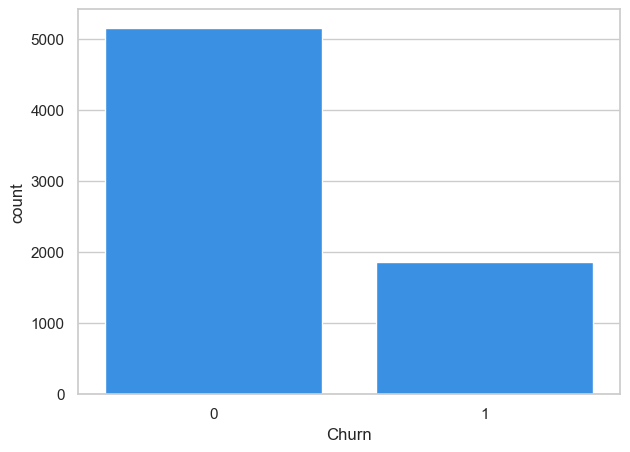

In [1033]:
sns.countplot(df2, x='Churn', color='dodgerblue')

### Feature Relevance

*i. Are all the features relevant? Examine the difference in means of Churn across the features.*

Examining the difference in means of Churn across the features, the majority of them have fairly recognizable differences except for Phone, which is 0.901 for existing customers and 0.909 for former customers. 

In [1034]:
df2.groupby('Churn').mean()

,Charges,TotalCharges,Contract_type,Paperless,Check,Phone,Tenure,Dependents,Internet
Churn,,,,,,,,,
0,61.307408,2555.344141,0.429983,0.536122,0.251017,0.901220,37.650010,0.343405,0.272516
1,74.441332,1531.796094,0.885500,0.749064,0.164794,0.909042,17.979133,0.174425,0.060460


*j. Examine the overlap in the distributions of Churn for numerical features TotalCharges, Paperless, and tenure. Which variable is likely the best predictor of churn?*

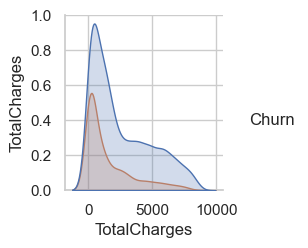

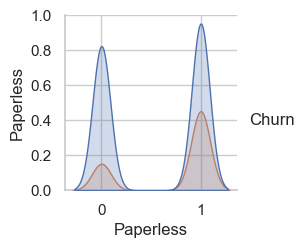

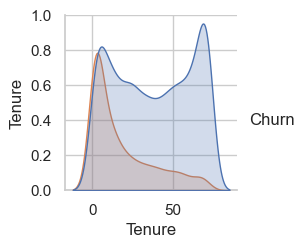

In [1035]:
pred_vars = ['TotalCharges', 'Paperless', 'Tenure']
for column in df2[pred_vars]: 
    sns.pairplot(df2, vars=[column], hue='Churn')

Based on the distributions of the selected predictor variables, it appears that tenure will have the most impact on Churn rate due to having a significantly different pattern with less overlap.

### Feature Redundancy

*k. Check for collinearity. Comment.*

Because correlations span from negative to positive, use a diverging color palette, with blue indicating positive correlations and red indicating very small positive to negative correlations.

<Axes: >

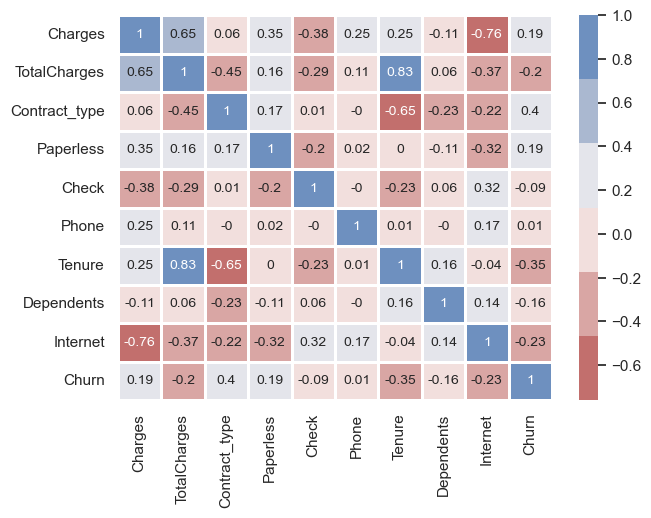

In [1036]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(df2.corr().round(2), linewidths=2.0,
            annot=True, annot_kws={"size": 10},
            cmap=sns.color_palette("vlag_r"))

Based on the correlation matrix, we can identify the significant collinearity between the following variables, some of which may be dropped from the analysis:<br>
- Internet -> Charges: -0.76
- Total Charges -> Tenure: 0.83
- Contract -> Tenure: -0.65
- Charges -> Total_Charges: 0.65

### Create Feature and Target Data Structures

*l. Define all feature variables in a data structure X. Define the target variable as a data structure $y$, a column of 0's and 1's.*

In [1037]:
y = df2['Churn']

pred_vars = ['Charges', 'TotalCharges', 'Contract_type', 'Paperless', 
             'Check', 'Phone', 'Tenure', 'Dependents', 'Internet']
X = df2[pred_vars]
X.shape

(7032, 9)

*m. All dummy variables consist of values of only 0 or 1. The numerical variables _TotalCharges_ and _Tenure_ range much more than 0 to 1. Generate a box plot for these variables to examine their range and check for outliers. Discuss.*

<Axes: xlabel='Tenure'>

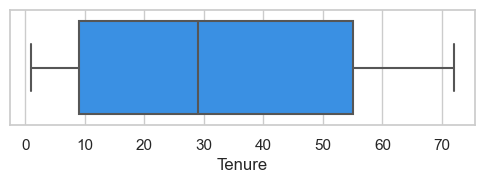

In [1038]:
plt.figure(figsize=(6,1.5))
sns.set_theme(style='whitegrid')
sns.boxplot(df2, x='Tenure', color='dodgerblue')

<Axes: xlabel='TotalCharges'>

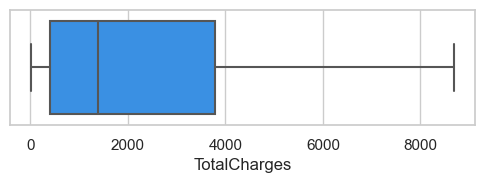

In [1039]:
plt.figure(figsize=(6,1.5))
sns.set_theme(style='whitegrid')
sns.boxplot(df2, x='TotalCharges', color='dodgerblue')

*n. Convert _TotalCharges_ and _Tenure_ these variables to a 0 to 1 range so that all feature variables are on the same scale. As always, verify any change in the data.*

Hint: Re-scaling done in 02PreProcess.

In [1040]:
from sklearn import preprocessing

Check data types to convert if necessary:

In [1041]:
df2[['TotalCharges', 'Tenure']].dtypes 

TotalCharges    float64
Tenure            int64
dtype: object

Convert Tenure to float64 and verify change:

In [1042]:
df2.loc[:, 'Tenure'] = df2.loc[:, 'Tenure'].astype('float64')
df2[['TotalCharges', 'Tenure']].dtypes

/var/folders/0r/8gtkp8rd5lx4q_4w2fvszkz80000gn/T/ipykernel_30884/1483552546.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:, 'Tenure'] = df2.loc[:, 'Tenure'].astype('float64')


TotalCharges    float64
Tenure          float64
dtype: object

**Scale using min/max scaler**

Import MinMaxScaler from sklearn and instantiate:

In [1043]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

Use fit_transform() to transform TotalCharges and Tenure columns in the df2 data frame and preview the result:

In [1044]:
scaled_cols = ['Charges', 'TotalCharges', 'Contract_type', 'Paperless', 
               'Check', 'Phone', 'Tenure', 'Dependents', 'Internet', 'Churn']
df2[scaled_cols] = mm_scaler.fit_transform(df2[scaled_cols])
df2.head()

,Charges,TotalCharges,Contract_type,Paperless,Check,Phone,Tenure,Dependents,Internet,Churn
0,0.115423,0.001275,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.385075,0.215867,0.0,0.0,1.0,1.0,0.464789,0.0,0.0,0.0
2,0.354229,0.010310,1.0,1.0,1.0,1.0,0.014085,0.0,0.0,1.0
3,0.239303,0.210241,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.0
4,0.521891,0.015330,1.0,1.0,0.0,1.0,0.014085,0.0,0.0,1.0


Check the min & max values:

In [1045]:
print("Min Values:")
print(df2[['TotalCharges', 'Tenure']].min(), "\n")
print("Max Values:")
print(df2[['TotalCharges', 'Tenure']].max())

Min Values:
TotalCharges    0.0
Tenure          0.0
dtype: float64 

Max Values:
TotalCharges    1.0
Tenure          1.0
dtype: float64


**Data Leak Warning**: Better to do this analysis with the re-scaling only done on test data, then done again, anew, on the testing data separately. Otherwise, there is *data leakage*, where the testing data is confounded with the training data because at this point in the analysis, the training and testing data are together. Characteristics of the training data will impact the way that later test data is tested.

If doing just one train/test split, separate re-scaling of training and testing data can easily be accomplished with what we know. Just rescale separately the two data sets after forming the split. For the preferred $k$-fold cross-validation, however, the testing data in each fold needs to be re-scaled separately. To do so we need to introduce the concept of a `pipeline`, which starts to be too much after introducing everything else. To be pure, if on the job for example, should do the separate re-scaling after the train/test split and not do $k$-fold. Or, even better, learn about constructing a `pipeline`, such as <a href="https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf">here</a> and <a href="https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_pipeline/">here</a>. Another straightforward step, not that hard, but enough for now and not included in this course.

Preferably, we would estimate the re-scaling parameters and then the model itself on all of the data only after successful model validation. This version of the model would then be used to forecast from new data.  

Fortunately, with such a large data set, the re-scaling parameters should be reasonably robust. If not constructing a `pipeline`, this step of doing one data rescaling before validation is better than not doing any rescaling at all given the large discrepancies of scales for _TotalCharges_ and _Tenure_.

## Fit Model and Evaluate with _One_ Hold-Out Sample

*o. Do a 70% training data and 30% testing data split of X and $y$ data structures. Show the dimensions of the output data structures.*

In [1046]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    stratify=df2['Churn'],
                                                    random_state=1)

Show dimensions of output data structures:

In [1047]:
print("Shape of X data structures: ", X_train.shape, X_test.shape)
print("Shape of y data structures: ", y_train.shape, y_test.shape)

Shape of X data structures:  (4922, 9) (2110, 9)
Shape of y data structures:  (4922,) (2110,)


*p. Fit the model to the training data.*

Access the solution algorithm and instantiate:

In [1048]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=500)

In [1049]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Evaluate fit:

In [1050]:
y_fit = logistic_model.predict(X_train)
y_pred = logistic_model.predict(X_test)

*q. Calculate the baseline probability for prediction in the absence of all information regarding X, the null model, the group with the largest proportion.*

In [1051]:
my = y.mean()
max_my = np.max([y.mean(), 1-y.mean()])
print('Proportion of 0\'s (no-churn): %.3f' % (1-my))
print('Proportion of 1\'s (churn): %.3f' % my)
print('Null model accuracy: %.3f' % max_my)

Proportion of 0's (no-churn): 0.734
Proportion of 1's (churn): 0.266
Null model accuracy: 0.734


*r. As a basis for evaluating forecasting accuracy, get the values fit by the model from the corresponding X values, for training and testing data.*

In [1052]:
from sklearn.metrics import accuracy_score
print('Accuracy for training data: %.3f' % accuracy_score(y_train, y_fit))
print('Accuracy for testing data: %.3f' % accuracy_score(y_test, y_pred))

Accuracy for training data: 0.792
Accuracy for testing data: 0.784


*s.  For the testing data, calculate the probability of Churning for all the rows of testing data from the values of the features, the predictor variables.*

In [1053]:
probability = logistic_model.predict_proba(X_test)
probability = pd.DataFrame(probability)
probability.head().transpose()

,0,1,2,3,4
0,0.516257,0.616849,0.999374,0.346118,0.77873
1,0.483743,0.383151,0.000626,0.653882,0.22127


*t. To understand more of what is happening here (for pedagogy), view the true values, forecasted values, and the estimated probability of Churning for about 10 or so rows of data. Best display is as a data frame.*

In [1054]:
probs = [i[0] for i in logistic_model.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
'pred_values': y_pred,
'pred_probs':probs})
pred_df.head(10).transpose().style.format("{:.3}")

,2057,5570,6528,5718,1495,5903,3422,5392,3609,1735
true_values,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
pred_values,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
pred_probs,0.516,0.617,0.999,0.346,0.779,0.89,0.964,0.989,0.854,0.91


*u. Assess the accuracy of the model on training and testing data. Any overfitting?*

The testing performance only dropped 0.8%, so very minimal overfitting with the selected variables. However, at just 78.4% testing accuracy, there is significant room for improvement in forecasting accuracy. At 78.4% testing accuracy, the model is only slightly more accurate than the null model (73.4%).

*v. Show the confusion matrix and explicitly identify the True Negatives, True Positives, False Negatives, and False Positives.*

In [1055]:
from sklearn.metrics import confusion_matrix
dc = pd.DataFrame(confusion_matrix(y_test, y_pred))
dc

,0,1
0,1348,201
1,254,307


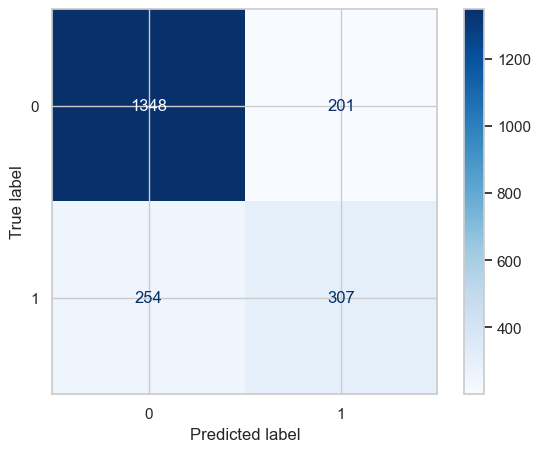

In [1056]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [1057]:
print("True Negatives: ", dc.iloc[0,0])
print("True Positives: ", dc.iloc[1,1])
print("False Negatives: ", dc.iloc[1,0])
print("False Positives: ", dc.iloc[0,1])

True Negatives:  1348
True Positives:  307
False Negatives:  254
False Positives:  201


*w. Calculate the recall, precision, and, F1 metrics. Comment on the meaning of each from the perspective of management.*

In [1058]:
from sklearn.metrics import recall_score, precision_score, f1_score
print ('Recall for testing data: %.3f' % recall_score(y_test, y_pred))
print ('Precision for testing data: %.3f' % precision_score(y_test, y_pred))
print ('F1 for testing data: %.3f' % f1_score(y_test, y_pred))

Recall for testing data: 0.547
Precision for testing data: 0.604
F1 for testing data: 0.574


- Recall is a measure of the proportion of actual positive instances correctly detected as positive. A recall of .547 indicates that only 54.7% of the positive predictions will be correctly labeled as positive, leaving a 45.3% chance of misclassifying a 1 as a 0 (customer churn as a customer retained). There were 254 false negatives in the confusion matrix.
- Precision is a measure of the proportion of correctly labeled positive outcomes. A precision score of 0.604 indicates that of those that the model forecasted as churn, 60.4% are actually churn, and 39.6% are not churn (201 false positives).
- The F1 score is the balance betwen Recall and Precision, and provides the harmonic mean. 

## Fit Model, then Predict, Evaluate with _Multiple_ Hold-Out Samples

*x. Do a 5-fold cross-validation an report individual fold and average values of accuracy, recall, and precision.*

Access the StratifiedKFold algorithm and instantiate with 5 splits:

In [1059]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

Use cross_validate() to generate the scores:

In [1060]:
from sklearn.model_selection import cross_validate
scores = cross_validate(logistic_model, X, y, cv=skf,
scoring=('accuracy', 'recall', 'precision'),
return_train_score=True)

Display the scores as a data frame:

In [1061]:
ds = pd.DataFrame(scores).round(3)
ds.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,0.221,0.003,0.793,0.793,0.527,0.534,0.633,0.632
1,0.065,0.002,0.784,0.790,0.567,0.542,0.599,0.620
2,0.065,0.005,0.783,0.792,0.501,0.555,0.611,0.621
3,0.059,0.002,0.790,0.789,0.532,0.540,0.624,0.618
4,0.058,0.003,0.799,0.788,0.548,0.516,0.643,0.622


Average values for fit metrics:

In [1062]:
print('Mean of test accuracy: %.3f' % ds['test_accuracy'].mean())
print('Mean of test recall: %.3f' % ds['test_recall'].mean())
print('Mean of test precision: %.3f' % ds['test_precision'].mean())

Mean of test accuracy: 0.790
Mean of test recall: 0.535
Mean of test precision: 0.622


*y. Comment on the worth of the model.*

The results from the K-fold analysis are split. Accuracy improved from 0.784 to 0.790, recall decreased from 0.547 to 0.535, and precision improved slightly from 0.604 to 0.622. Overall, I would suggest that this model is not highly effective at predicting customer churn due to the high probability of predicing false positives and false negatives.

## Automated Feature Selection

### Univariate Selection

*z. Do a univariate feature selection of the top 4 features. Identify these features.*

In [1063]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(k=4).fit(X,y)
selected = selector.get_support()
selected

array([False,  True,  True, False, False, False,  True, False,  True])

In [1064]:
X2 = X.iloc[:, selected]
X2.head()

,TotalCharges,Contract_type,Tenure,Internet
0,29.85,1,1,0
1,1889.50,0,34,0
2,108.15,1,2,0
3,1840.75,0,45,0
4,151.65,1,2,0


The top 4 features using the univariate selection process include: TotalCharges, Contract_Month-to-month, Tenure, and Internet.

### Multivariate Selection

*aa. Do a multivariate feature selection. Identify the selected features.*

In [1065]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
selector = RFE(logistic_model, n_features_to_select=4, step=1).fit(X,y)

In [1066]:
print(selector.support_)

[False False  True  True False False False  True  True]


In [1067]:
X_reduced = X.iloc[:, selector.support_]
X_reduced.head()

,Contract_type,Paperless,Dependents,Internet
0,1,1,0,0
1,0,0,0,0
2,1,1,0,0
3,0,0,0,0
4,1,1,0,0


The top 4 features using the multivariate selection process include: Contract_Month-to-month, Paperless, Dependents, Internet

*ab. Rank the features in importance.*

In [1068]:
rnk = pd.DataFrame()
rnk['Feature'] = X.columns
rnk['Rank']= selector.ranking_
rnk.sort_values('Rank').transpose()

,2,3,7,8,5,4,6,0,1
Feature,Contract_type,Paperless,Dependents,Internet,Phone,Check,Tenure,Charges,TotalCharges
Rank,1,1,1,1,2,3,4,5,6


No validation of the reduced model as the full model did not validate. Knowing the most important features serves as a building block to future models, not to serve as model on its own.

In [1069]:
scores = cross_validate(logistic_model, X_reduced, y, cv=skf,
scoring=('accuracy', 'recall', 'precision'),
return_train_score=True)
ds = pd.DataFrame(scores).round(3)
print(ds)
print('\n')
print('Mean of test accuracy: %.3f' % ds['test_accuracy'].mean())
21
print('Mean of test recall: %.3f' % ds['test_recall'].mean())
print('Mean of test precision: %.3f' % ds['test_precision'].mean())

   fit_time  score_time  test_accuracy  train_accuracy  test_recall  \
0     0.009       0.013          0.746           0.750        0.559   
1     0.011       0.002          0.751           0.749        0.586   
2     0.007       0.002          0.748           0.749        0.555   
3     0.005       0.002          0.730           0.754        0.511   
4     0.011       0.002          0.770           0.744        0.599   

   train_recall  test_precision  train_precision  
0         0.563           0.521            0.528  
1         0.556           0.529            0.526  
2         0.564           0.524            0.527  
3         0.575           0.494            0.534  
4         0.553           0.563            0.517  


Mean of test accuracy: 0.749
Mean of test recall: 0.562
Mean of test precision: 0.526


### Estimate Validated Model on All Data

Not going to be using this model in the future in its current form, but for completeness, provide the best estimate of the model from all of the data.

In [1070]:
logistic_model.fit(X_reduced, y)

LogisticRegression(max_iter=500)

## Apply the Model

*ac. Forecast if the customer churns from new data.*

Customer data:

- Charges: 200
- Paperless: 1
- Check: 1
- Phone: 1
- Tenure: 12
- Dependents: 0
- Internet: 0


Create a list of these data values, making sure to enter in the same order that the variables appear in the X data frame.

Also, because the data was re-scaled, any new data from which to make a prediction also needs to be re-scaled. I do not believe there was an example of this, so the re-scaling transformation is provided here. Basically, take the *mm_scaler* construct previously defined from the original transformation, and then apply the `transform()` function by itself, without the `fit()` function.

In [1071]:
X.head()

,Charges,TotalCharges,Contract_type,Paperless,Check,Phone,Tenure,Dependents,Internet
0,29.85,29.85,1,1,0,0,1,0,0
1,56.95,1889.50,0,0,1,1,34,0,0
2,53.85,108.15,1,1,1,1,2,0,0
3,42.30,1840.75,0,0,0,0,45,0,0
4,70.70,151.65,1,1,0,1,2,0,0


In [1072]:
X_new = [[200, 1500, 12]] 

X_new = mm_scaler.transform(X_new)

X_new

/Users/chasecarlson/anaconda3/envs/GSCM575-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but MinMaxScaler is expecting 10 features as input.

Now from this re-scaled list, create the forecast, Group 0 (not-churn) or Group 1 (churn) and the associated probability.

In [ ]:
X_new = [[0.0209093, 1, 1, 1, 0.15492958, 0 , 0]]
y_new = logistic_model.predict(X_new)
print("Predicted group membership:", y_new)
y_prob = logistic_model.predict_proba(X_new)
print(round(y_prob[0,1], 3))

/Users/chasecarlson/anaconda3/envs/GSCM575-env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 7 features, but LogisticRegression is expecting 4 features as input.